### Importing Python Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the CSV dataset

In [4]:
train = pd.read_csv("titanic_train.csv")

### First Five Rows

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Performing Exploratory Data Analysis

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

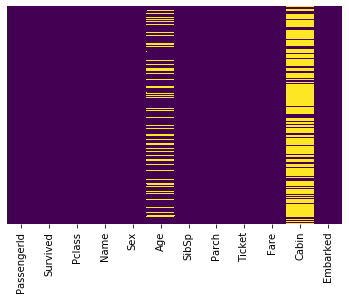

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Ploting the Count of Survived people

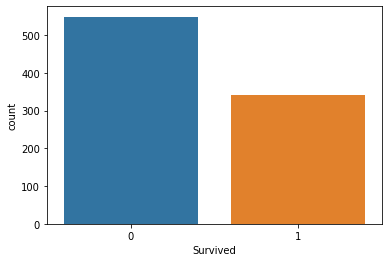

In [9]:
sns.countplot(x='Survived', data=train)

### Count of Survived people wrt  to Sex

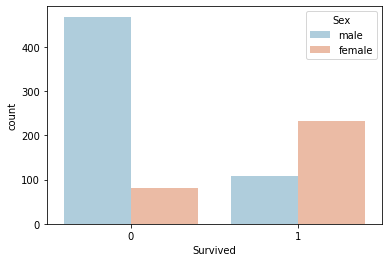

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

### Count of Survived People wrt to Pclass

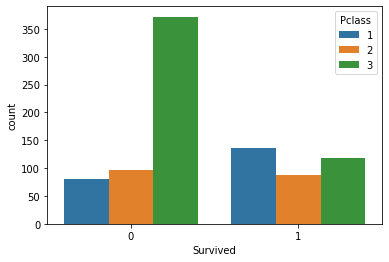

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

### Ploting the age of people in ship

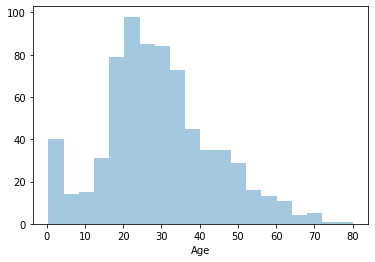

In [12]:
sns.distplot(train['Age'].dropna(),kde=False)

### Knowing the Siblings of Passenger

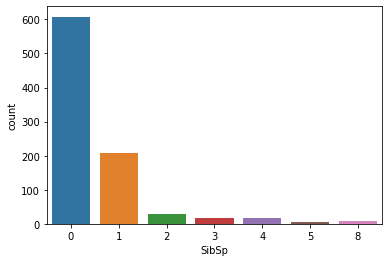

In [13]:
sns.countplot(x='SibSp', data=train)

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Age of passengers wrt to Pclass

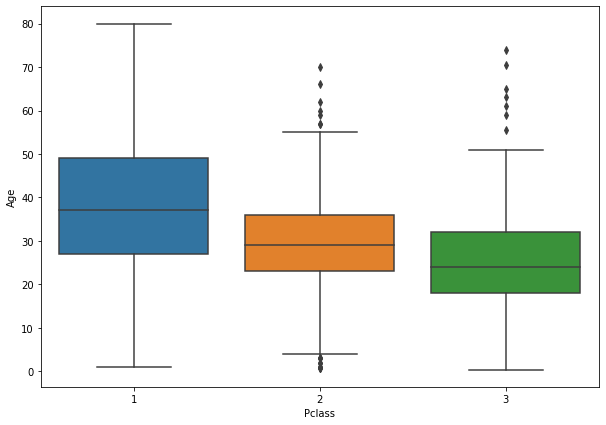

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

### Dealing with missing data

#### Replacing the NaN values in Age Independent variable with mean of age

In [16]:
train['Age'].mean()

29.69911764705882

In [17]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

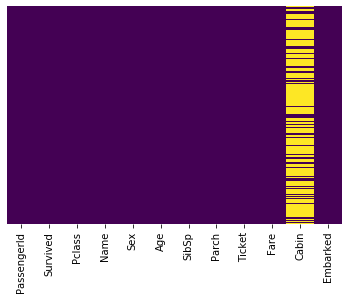

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Droping the Cabin Variable as this as many NaN values and not much useful for analysis

In [19]:
train.drop('Cabin', axis=1, inplace=True)

### Droping the rows having other NaN Values

In [20]:
train.dropna(inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Changing the Categorial Variables to 0 and 1

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [23]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [24]:
train = pd.concat([train, sex, embark], axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
train = train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [27]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


### Model Development

#### Input Variables and Taget Variable

In [29]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Splitting the data to train and test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### Creating the Instance

In [46]:
logmodel = LogisticRegression()

#### Fitting the Model

In [47]:
logmodel.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the y_test over X_test data

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
logmodel.coef_

array([[-0.74691999, -0.02251924, -0.24200798, -0.07829755,  0.00457544,
        -2.3893504 ,  0.11857872, -0.1331464 ]])

In [51]:
logmodel.intercept_

array([3.30793997])

In [52]:
prediction = logmodel.predict(X_test)

In [64]:
accuracy_score = accuracy_score(y_test, prediction)
accuracy_score

0.8095238095238095

In [65]:
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[160  14]
 [ 42  78]]


In [67]:
print('misclassified samples: %d' %(y_test!=prediction).sum())

misclassified samples: 56
